In [6]:
import pandas as pd

In [7]:
data=pd.read_csv('./400_epoch_log.csv')
data2 = pd.read_csv('./MLP_loss.csv')

In [11]:
import numpy as np
import math


def map(data,MIN,MAX):
    """
    归一化映射到任意区间
    :param data: 数据
    :param MIN: 目标数据最小值
    :param MAX: 目标数据最小值
    :return:
    """
    d_min = np.max(data)    # 当前数据最大值
    d_max = np.min(data)    # 当前数据最小值
    return MIN +(MAX-MIN)/(d_max-d_min) * (data - d_min)

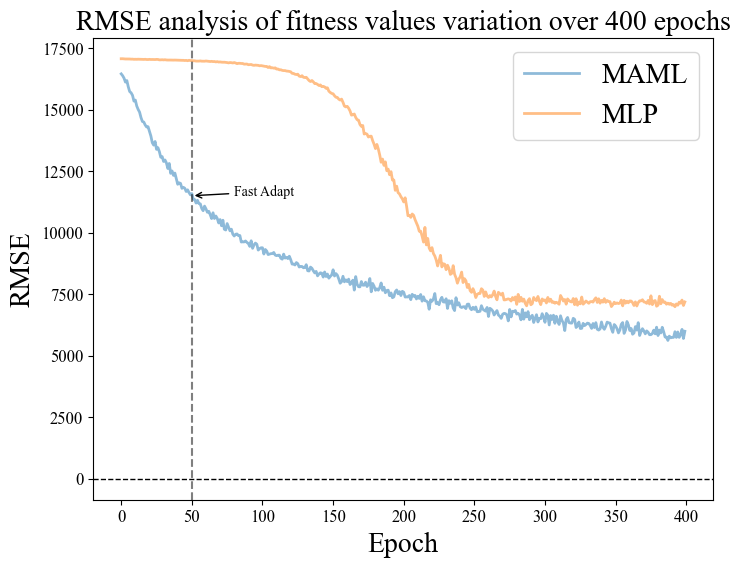

In [26]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
# 生成随机数据
x = np.arange(0, 400)
y2 = data['valid_error']
y4 = data2['valid_error']
y2 = (y2 - np.min(y2)) / (np.max(y2) - np.min(y2))
y4 = (y4 - np.min(y4)) / (np.max(y4) - np.min(y4))

y2 = map(y2,1,0.3)
y4 = map(y4,1,0.4)

y2 = map(y2,16453.32,5619.277)
y4 = map(y4,17068.98,6990.255)

# 绘图
fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(x, y1, alpha=0.5, color='red', linewidth=2, label='Train')
ax.plot(x, y2, alpha=0.5, linewidth=2, label='MAML')

# ax.plot(x, y3, alpha=0.5, color='gold', linewidth=2, label='Train')
ax.plot(x, y4, alpha=0.5, linewidth=2, label='MLP')

ax.axvline(x=50, color='black', linestyle='--',alpha=0.5)
annotation_text = "Fast Adapt"
ax.annotate(annotation_text, xy=(50, 11500), xytext=(80, 11500),
            arrowprops=dict(facecolor='black', arrowstyle='->'))
# 界限线
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
# 标题和标签
ax.set_title('RMSE analysis of fitness values variation over 400 epochs', fontsize=20)
ax.set_xlabel('Epoch', fontsize=20)
ax.set_ylabel('RMSE', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)
# 图例
ax.legend(loc='best', fontsize=20)

plt.show()